In [4]:
%pylab inline
#import sys

#sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('~/matplotlib.mplstyle')
#import io_sims as ios
#import gizmo_analysis as ga
#import pynbody
#import halo_analysis as halo

#from astropy import units as u
#import nba
#import healpy as hp
#from  healpy.newvisufunc import projview, newprojplot

#import Corrfunc
#from Corrfunc.mocks.DDtheta_mocks  import DDtheta_mocks
#from Corrfunc.utils import convert_3d_counts_to_cf
#from FIRE_analysis import mollweide_projection
#from astropy.coordinates import Angle

#from scipy import linalg
from matplotlib import colors
import matplotlib.patheffects as PathEffects

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [5]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 18
mpl.rcParams['text.usetex'] = False

In [6]:
wm12b = np.loadtxt('../data/corrfunc/m12b/m12b_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12c = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12f = np.loadtxt('../data/corrfunc/m12f/m12f_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12i = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12m = np.loadtxt('../data/corrfunc/m12m/m12m_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12r = np.loadtxt('../data/corrfunc/m12r/m12r_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')
wm12w = np.loadtxt('../data/corrfunc/m12w/m12w_wmatrix_corrfunc_sat_300_600_subhalos_sats_False.txt')

In [7]:
def host_times(sim):
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[:] 

In [8]:
m12b_t = host_times('m12b')
m12c_t = host_times('m12c')
m12f_t = host_times('m12f')
m12i_t = host_times('m12i')
m12m_t = host_times('m12m')
m12r_t = host_times('m12r')
m12w_t = host_times('m12w')

In [10]:
# m12b 

# subhalos 

m12b_wsub2 = np.loadtxt('../data/corrfunc/m12b/m12b_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')
m12b_wsub = np.loadtxt('../data/m12b_wmatrix_corrfunc_50_300_subhalos_no_sats_False.txt')

# satellites 
m12b_wsat = np.loadtxt('../data/corrfunc/m12b/m12b_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12b_dm = np.zeros((300, 180)) 
m12b_st = np.zeros((300, 180)) 

for i in range(300, 591, 10):
    m12b_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12b/m12b_wmatrix_corrfunc_50_300_dm_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    m12b_st[i-300:i-290] = np.loadtxt('../data/corrfunc/m12b/m12b_wmatrix_corrfunc_50_300_stars_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

In [11]:
# m12f 

# subhalos 

m12f_wsub = np.loadtxt('../data/corrfunc/m12f/m12f_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12f_wsat = np.loadtxt('../data/corrfunc/m12f/m12f_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12f_dm = np.zeros((300, 180)) 
m12f_st = np.zeros((300, 180)) 

for i in range(300, 591, 10):
    m12f_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12f/m12f_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    m12f_st[i-300:i-290] = np.loadtxt('../data/corrfunc/m12f/m12f_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

In [12]:
# m12i

# subhalos 

m12i_wsub = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12i_wsat = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12i_dm = np.zeros((300, 180)) 
m12i_st = np.zeros((300, 180)) 

for i in range(300, 591, 10):
    m12i_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_dark_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    m12i_st[i-300:i-290] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

In [13]:
# m12r

# subhalos 

m12r_wsub = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12r_wsat = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12r_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12r_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12r/m12r_wmatrix_corrfunc_50_300_dark_particles_sats3_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))



In [14]:
# m12m

# subhalos 

m12m_wsub = np.loadtxt('../data/corrfunc/m12m/m12m_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12m_wsat = np.loadtxt('../data/corrfunc/m12m/m12m_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12m_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12m_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12m/m12m_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))



In [15]:
# m12w

# subhalos 

m12w_wsub = np.loadtxt('../data/corrfunc/m12w/m12w_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12w_wsat = np.loadtxt('../data/corrfunc/m12w/m12w_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12w_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12w_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12w/m12w_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


In [16]:
# m12c

# subhalos 

m12c_wsub = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12c_wsat = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12c_dm = np.zeros((300, 180)) 
#m12i_st = np.zeros((400, 180)) 

for i in range(300, 591, 10):
    m12c_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_50_300_dark_particles_sats_True_snaps_{:03d}_{:03d}.txt'.format(i, i+10))
    #m12i_st[i-200:i-190] = np.loadtxt('../data/corrfunc/m12i/m12i_wmatrix_corrfunc_50_300_star_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


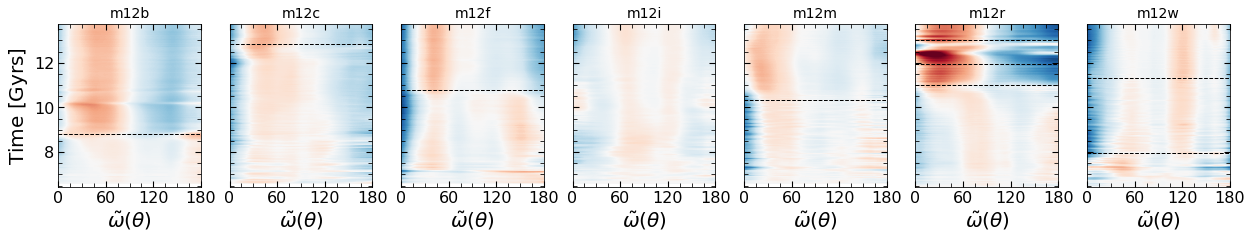

In [13]:
fig, ax = plt.subplots(1, 7, figsize=(21, 3), sharey=True, sharex=True)

ax[0].imshow(((m12b_dm+1)/(m12b_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

ax[1].imshow(((m12c_dm+1)/(m12c_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12c_t[300], m12c_t[-1]], aspect='auto')

ax[2].imshow(((m12f_dm+1)/(m12f_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12f_t[300], m12f_t[-1]], aspect='auto')

ax[3].imshow(((m12i_dm+1)/(m12i_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')

ax[4].imshow(((m12m_dm+1)/(m12m_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12m_t[300], m12m_t[-1]], aspect='auto')

ax[5].imshow(((m12r_dm+1)/(m12r_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12r_t[300], m12r_t[-1]], aspect='auto')

ax[6].imshow(((m12w_dm+1)/(m12w_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12w_t[300], m12w_t[-1]], aspect='auto')

ax[0].set_xlim(0, 180)
ax[0].set_xticks([0, 60, 120, 180])


ax[0].axhline(m12b_t[385], c='k', ls='--', lw=1)
ax[1].axhline(m12c_t[549], c='k', ls='--', lw=1)
ax[2].axhline(m12f_t[462], c='k', ls='--', lw=1)
ax[4].axhline(m12m_t[444], c='k', ls='--', lw=1)

ax[5].axhline(m12r_t[477], c='k', ls='--', lw=1)
ax[5].axhline(m12r_t[515], c='k', ls='--', lw=1)
ax[5].axhline(m12r_t[560], c='k', ls='--', lw=1)
ax[6].axhline(m12w_t[358], c='k', ls='--', lw=1)
ax[6].axhline(m12w_t[490], c='k', ls='--', lw=1)


#m12b_peri = [385]
#m12c_peri = [549]
#m12f_peri = [462]
#m12i_peri = []
#m12m_peri = [444]
#m12r_peri = [477, 515, 560]
#m12w_peri = [358, 490]

ax[0].set_title('m12b', fontsize=14)
ax[1].set_title('m12c', fontsize=14)
ax[2].set_title('m12f', fontsize=14)
ax[3].set_title('m12i', fontsize=14)
ax[4].set_title('m12m', fontsize=14)
ax[5].set_title('m12r', fontsize=14)
ax[6].set_title('m12w', fontsize=14)

ax[0].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[1].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[2].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[3].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[4].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[5].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[6].set_xlabel(r'$\tilde{\omega}(\theta)$')

ax[0].set_ylabel(r'$\rm{Time}\ [Gyrs]}$')

#plt.savefig('corrfunc_dm_all.pdf', bbox_inches='tight')

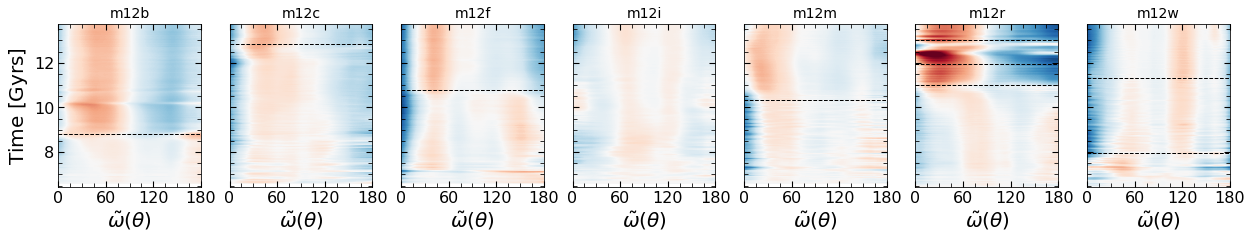

In [14]:
fig, ax = plt.subplots(1, 7, figsize=(21, 3), sharey=True, sharex=True)

ax[0].imshow(((m12b_dm+1)/(m12b_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

ax[1].imshow(((m12c_dm+1)/(m12c_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12c_t[300], m12c_t[-1]], aspect='auto')

ax[2].imshow(((m12f_dm+1)/(m12f_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12f_t[300], m12f_t[-1]], aspect='auto')

ax[3].imshow(((m12i_dm+1)/(m12i_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')

ax[4].imshow(((m12m_dm+1)/(m12m_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12m_t[300], m12m_t[-1]], aspect='auto')

ax[5].imshow(((m12r_dm+1)/(m12r_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12r_t[300], m12r_t[-1]], aspect='auto')

ax[6].imshow(((m12w_dm+1)/(m12w_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12w_t[300], m12w_t[-1]], aspect='auto')

ax[0].set_xlim(0, 180)
ax[0].set_xticks([0, 60, 120, 180])


ax[0].axhline(m12b_t[385], c='k', ls='--', lw=1)
ax[1].axhline(m12c_t[549], c='k', ls='--', lw=1)
ax[2].axhline(m12f_t[462], c='k', ls='--', lw=1)
ax[4].axhline(m12m_t[444], c='k', ls='--', lw=1)

ax[5].axhline(m12r_t[477], c='k', ls='--', lw=1)
ax[5].axhline(m12r_t[515], c='k', ls='--', lw=1)
ax[5].axhline(m12r_t[560], c='k', ls='--', lw=1)
ax[6].axhline(m12w_t[358], c='k', ls='--', lw=1)
ax[6].axhline(m12w_t[490], c='k', ls='--', lw=1)


#m12b_peri = [385]
#m12c_peri = [549]
#m12f_peri = [462]
#m12i_peri = []
#m12m_peri = [444]
#m12r_peri = [477, 515, 560]
#m12w_peri = [358, 490]

ax[0].set_title('m12b', fontsize=14)
ax[1].set_title('m12c', fontsize=14)
ax[2].set_title('m12f', fontsize=14)
ax[3].set_title('m12i', fontsize=14)
ax[4].set_title('m12m', fontsize=14)
ax[5].set_title('m12r', fontsize=14)
ax[6].set_title('m12w', fontsize=14)

ax[0].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[1].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[2].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[3].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[4].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[5].set_xlabel(r'$\tilde{\omega}(\theta)$')
ax[6].set_xlabel(r'$\tilde{\omega}(\theta)$')

ax[0].set_ylabel(r'$\rm{Time}\ [Gyrs]}$')

plt.savefig('corrfunc_dm_all.pdf', bbox_inches='tight')

In [8]:
# DM particles 
mwlmc_dm = np.zeros((400, 180)) 

for i in range(0, 391, 10):
    mwlmc_dm[i:i+10] = np.loadtxt('../data/corrfunc/mwlmc/MWLMC6_wmatrix_corrfunc_50_300_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


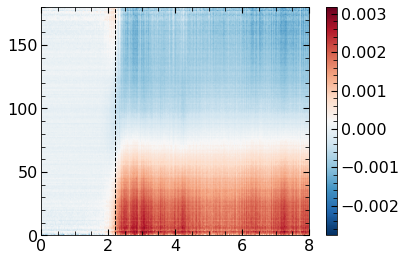

In [95]:
im = imshow(((mwlmc_dm+1) / (mwlmc_dm[0]+1)).T - 1, cmap='RdBu_r', extent=[0, 8, 0, 180], aspect='auto', origin='lower')
colorbar(im)
axvline(110*0.02, c='k', ls='--', lw=1)

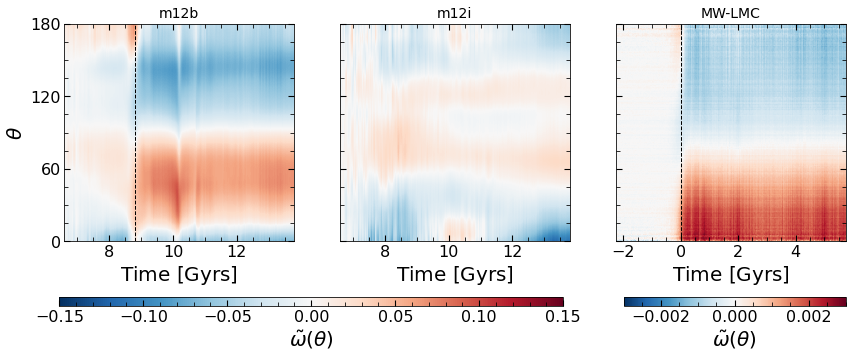

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

im1 = ax[0].imshow(((m12b_dm+1)/(m12b_dm[0]+1)).T - 1, origin='lower', vmin=-0.15, vmax=0.15, cmap='RdBu_r', 
       extent=[m12b_t[300], m12b_t[-1], 0, 180], aspect='auto')


im2 = ax[1].imshow(((m12i_dm+1)/(m12i_dm[0]+1)).T - 1, origin='lower', vmin=-0.15, vmax=0.15, cmap='RdBu_r', 
       extent=[m12i_t[300], m12i_t[-1], 0, 180], aspect='auto')

im3 = ax[2].imshow(((mwlmc_dm+1) / (mwlmc_dm[0]+1)).T - 1, origin='lower', cmap='RdBu_r', 
       extent=[0-113*0.02, 8-113*0.02, 0, 180], aspect='auto', vmin=-0.003, vmax=0.003)


ax[0].set_ylim(0, 180)
ax[0].set_yticks([0, 60, 120, 180])


ax[0].axvline(m12b_t[385], c='k', ls='--', lw=1)
ax[2].axvline(0, c='k', ls='--', lw=1)
ax[0].set_title('m12b', fontsize=14)
ax[1].set_title('m12i', fontsize=14)
ax[2].set_title('MW-LMC', fontsize=14)

ax[0].set_ylabel(r'$\theta$')
ax[0].set_xlabel(r'$\rm{Time}\ [Gyrs]}$')
ax[1].set_xlabel(r'$\rm{Time}\ [Gyrs]}$')
ax[2].set_xlabel(r'$\rm{Time}\ [Gyrs]}$')

cbar_ax1 = fig.add_axes([0.12, -0.1, 0.5, 0.03])
cbar = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')


cbar_ax2 = fig.add_axes([0.68, -0.1, 0.22, 0.03])
cbar = fig.colorbar(im3, cax=cbar_ax2, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')


#plt.savefig('corrfunc_main_dm_all.pdf', bbox_inches='tight')

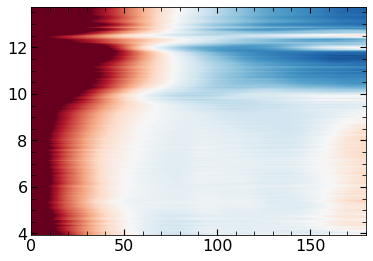

In [13]:
imshow(m12r_dm, origin='lower', vmin=-0.2, vmax=0.2, cmap='RdBu_r', 
       extent=[0, 180, m12r_t[200], m12r_t[-1]], aspect='auto')

/tmp/ipykernel_1955589/930669989.py:16: RuntimeWarning: divide by zero encountered in true_divide
  im = ax[0][3].imshow(((m12b_wsat+1)/(m12b_wsat[0]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap,
/tmp/ipykernel_1955589/930669989.py:16: RuntimeWarning: invalid value encountered in true_divide
  im = ax[0][3].imshow(((m12b_wsat+1)/(m12b_wsat[0]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap,


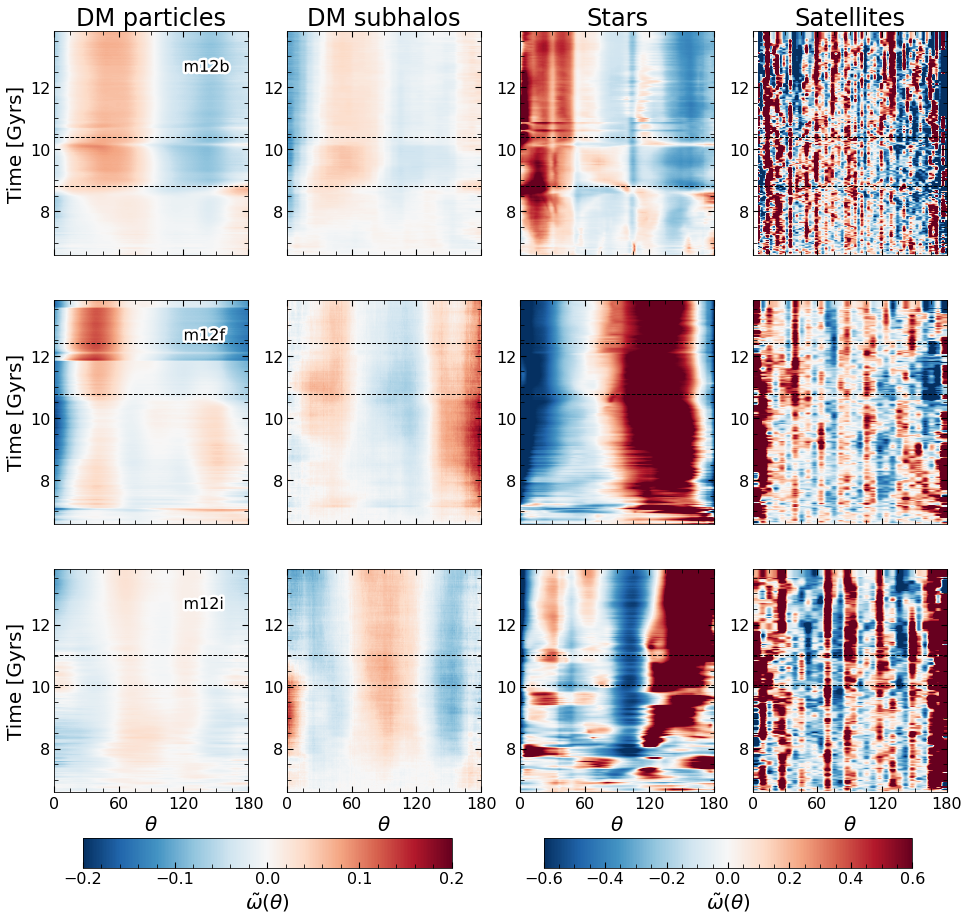

In [405]:
fig, ax = plt.subplots(3, 4, figsize=(16, 14), sharex=True, sharey=False)

cmap = 'RdBu_r'

im1 = ax[0][0].imshow(((m12b_dm+1)/(m12b_dm[100]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im1 = ax[0][1].imshow(((m12b_wsub+1)/(m12b_wsub[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

im2 = ax[0][2].imshow(((m12b_st+1)/(m12b_st[100]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im = ax[0][3].imshow(((m12b_wsat+1)/(m12b_wsat[0]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')



im1 = ax[1][0].imshow(((m12f_dm+1)/(m12f_dm[100]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap=cmap, 
       extent=[0, 180, m12f_t[200], m12f_t[-1]], aspect='auto')


im1 = ax[1][1].imshow(((m12f_wsub+1)/(m12f_wsub[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap=cmap, 
       extent=[0, 180, m12f_t[300], m12f_t[-1]], aspect='auto')

im2 = ax[1][2].imshow(((m12f_st+1)/(m12f_st[100]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12f_t[200], m12f_t[-1]], aspect='auto')


im = ax[1][3].imshow(((m12f_wsat+1)/(m12f_wsat[0]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')


im1 = ax[2][0].imshow(((m12i_dm+1)/(m12i_dm[100]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im1 = ax[2][1].imshow(((m12i_wsub+1)/(m12i_wsub[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

im2 = ax[2][2].imshow(((m12i_st+1)/(m12i_st[100]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im = ax[2][3].imshow(((m12i_wsat+1)/(m12i_wsat[0]+1)) - 1, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')


ax[0][0].set_title('DM particles')
ax[0][1].set_title('DM subhalos')
ax[0][2].set_title('Stars')
ax[0][3].set_title('Satellites')

ax[0][0].set_xticks([0, 60, 120, 180])

for i in range(4):
    ax[0][i].axhline(m12b_t[385], ls='--',lw=1, c='k')
    ax[0][i].axhline(m12b_t[447], ls='--',lw=1, c='k')
    
    ax[1][i].axhline(m12f_t[462], ls='--',lw=1, c='k')
    ax[1][i].axhline(m12f_t[530], ls='--',lw=1, c='k')
    
    ax[2][i].axhline(m12i_t[434], ls='--',lw=1, c='k')
    ax[2][i].axhline(m12i_t[472], ls='--',lw=1, c='k')
    
    ax[2][i].set_xlabel(r'$\theta$')
    
    ax[0][i].set_ylim(m12b_t[300], m12b_t[600])
    ax[1][i].set_ylim(m12f_t[300], m12f_t[600])
    ax[2][i].set_ylim(m12i_t[300], m12i_t[600])

    
cbar_ax1 = fig.add_axes([0.15, 0.05, 0.32, 0.03])
cbar_ax2 = fig.add_axes([0.55, 0.05, 0.32, 0.03])

cbar = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')


cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label(r'$\tilde{\omega} (\theta)$')

ax[0][0].set_ylabel('Time [Gyrs]')
ax[1][0].set_ylabel('Time [Gyrs]')
ax[2][0].set_ylabel('Time [Gyrs]')

txt1 = ax[0][0].text(120, 12.5, 'm12b', fontsize=16)
txt2 = ax[1][0].text(120, 12.5, 'm12f', fontsize=16)
txt3 = ax[2][0].text(120, 12.5, 'm12i', fontsize=16)

txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
plt.draw()
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
plt.draw()
txt3.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
plt.draw()

#plt.savefig('m12b_corrfunc_normed_histograms.png', bbox_inches='tight')

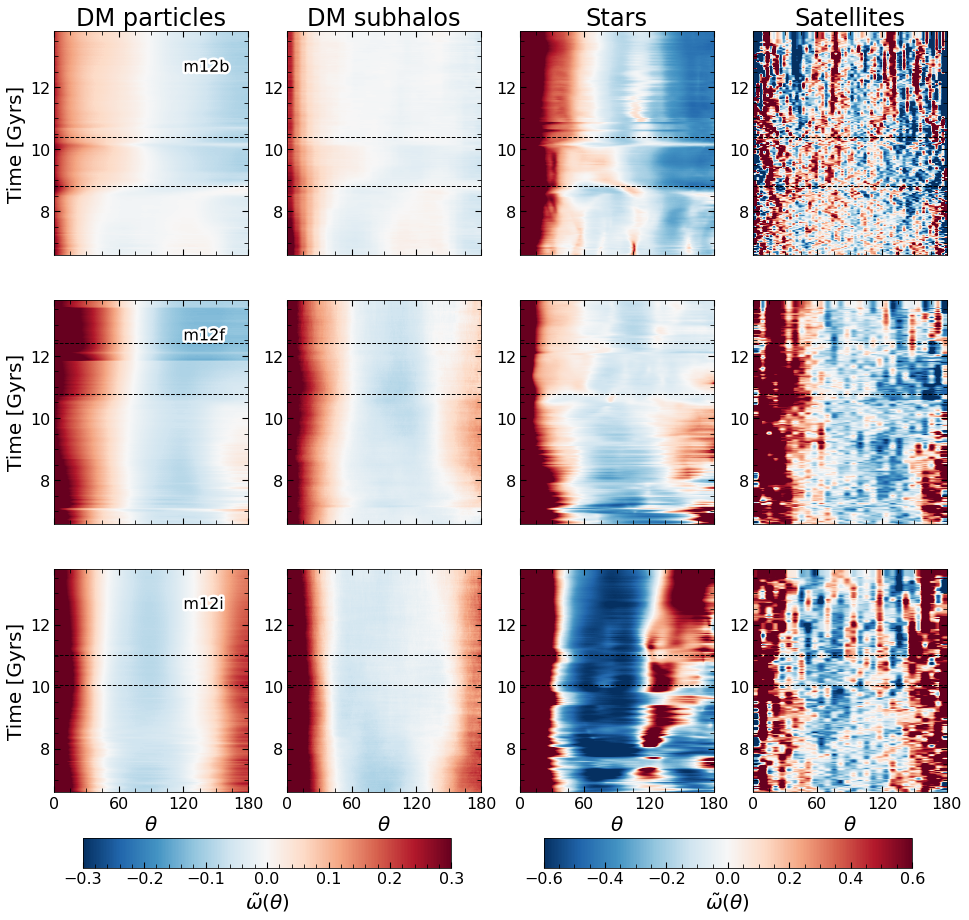

In [80]:
fig, ax = plt.subplots(3, 4, figsize=(16, 14), sharex=True, sharey=False)



im1 = ax[0][0].imshow(m12b_dm, origin='lower', vmin=-0.3, vmax=0.3, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im1 = ax[0][1].imshow(m12b_wsub, origin='lower', vmin=-0.3, vmax=0.3, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

im2 = ax[0][2].imshow(m12b_st, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im = ax[0][3].imshow(m12b_wsat, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')



im1 = ax[1][0].imshow(m12f_dm, origin='lower', vmin=-0.3, vmax=0.3, cmap=cmap, 
       extent=[0, 180, m12f_t[200], m12f_t[-1]], aspect='auto')


im1 = ax[1][1].imshow(m12f_wsub, origin='lower', vmin=-0.3, vmax=0.3, cmap=cmap, 
       extent=[0, 180, m12f_t[300], m12f_t[-1]], aspect='auto')

im2 = ax[1][2].imshow(m12f_st, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap ,
       extent=[0, 180, m12f_t[200], m12f_t[-1]], aspect='auto')


im = ax[1][3].imshow(m12f_wsat, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')


im1 = ax[2][0].imshow(m12i_dm, origin='lower', vmin=-0.3, vmax=0.3, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im1 = ax[2][1].imshow(m12i_wsub, origin='lower', vmin=-0.3, vmax=0.3, cmap=cmap, 
       extent=[0, 180, m12b_t[300], m12b_t[-1]], aspect='auto')

im2 = ax[2][2].imshow(m12i_st, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12b_t[200], m12b_t[-1]], aspect='auto')


im = ax[2][3].imshow(m12i_wsat, origin='lower', vmin=-0.6, vmax=0.6, cmap=cmap, 
       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')


ax[0][0].set_title('DM particles')
ax[0][1].set_title('DM subhalos')
ax[0][2].set_title('Stars')
ax[0][3].set_title('Satellites')

ax[0][0].set_xticks([0, 60, 120, 180])

for i in range(4):
    ax[0][i].axhline(m12b_t[385], ls='--',lw=1, c='k')
    ax[0][i].axhline(m12b_t[447], ls='--',lw=1, c='k')
    
    ax[1][i].axhline(m12f_t[462], ls='--',lw=1, c='k')
    ax[1][i].axhline(m12f_t[530], ls='--',lw=1, c='k')
    
    ax[2][i].axhline(m12i_t[434], ls='--',lw=1, c='k')
    ax[2][i].axhline(m12i_t[472], ls='--',lw=1, c='k')
    
    ax[2][i].set_xlabel(r'$\theta$')
    
    ax[0][i].set_ylim(m12b_t[300], m12b_t[600])
    ax[1][i].set_ylim(m12f_t[300], m12f_t[600])
    ax[2][i].set_ylim(m12i_t[300], m12i_t[600])
    
cbar_ax1 = fig.add_axes([0.15, 0.05, 0.32, 0.03])
cbar_ax2 = fig.add_axes([0.55, 0.05, 0.32, 0.03])

cbar = fig.colorbar(im1, cax=cbar_ax1, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')


cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')
cbar2.set_label(r'$\tilde{\omega} (\theta)$')

ax[0][0].set_ylabel('Time [Gyrs]')
ax[1][0].set_ylabel('Time [Gyrs]')
ax[2][0].set_ylabel('Time [Gyrs]')


txt1 = ax[0][0].text(120, 12.5, 'm12b', fontsize=16)
txt2 = ax[1][0].text(120, 12.5, 'm12f', fontsize=16)
txt3 = ax[2][0].text(120, 12.5, 'm12i', fontsize=16)

txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
plt.draw()
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
plt.draw()
txt3.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
plt.draw()

plt.savefig('m12b_corrfunc_histograms.png', bbox_inches='tight')

In [ ]:
# Clustering @ 30. 

In [54]:
shape(m12f_dm)

(400, 180)

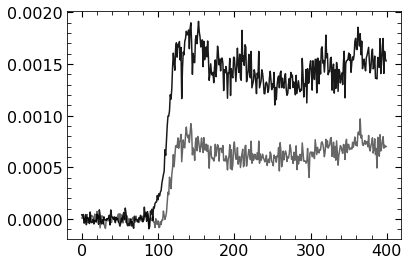

In [100]:
plt.plot(mwlmc_dm[:,36], lw=1.5, label=r'$\theta=36^{\circ}$', c='k', alpha=0.9)
plt.plot(mwlmc_dm[:,60], lw=1.5, label=r'$\theta=36^{\circ}$', c='k', alpha=0.6)


(6.0, 13.8)

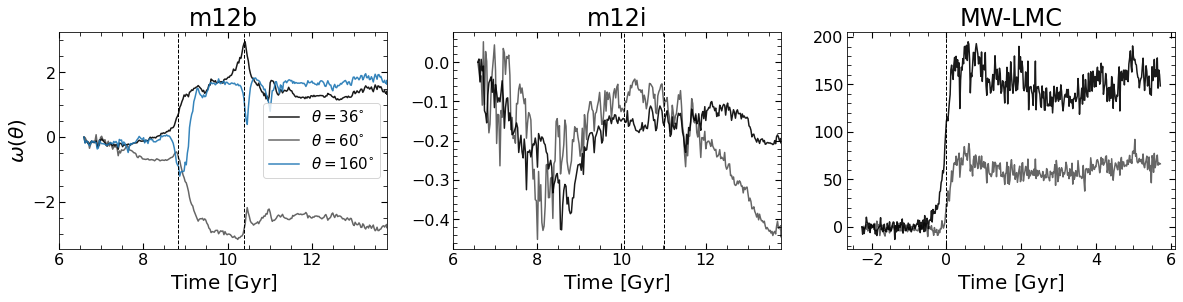

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

ax[0].plot(m12b_t[300:-1], (m12b_dm[:,30]/m12b_dm[0,30]) - 1, lw=1.5, label=r'$\theta=36^{\circ}$', c='k', alpha=0.9)
ax[0].plot(m12b_t[300:-1], (m12b_dm[:,60]/m12b_dm[0,60]) - 1, lw=1.5, label=r'$\theta=60^{\circ}$', c='k', alpha=0.6)
ax[0].plot(m12b_t[300:-1], (m12b_dm[:,160]/m12b_dm[0,160]) - 1, lw=1.5, label=r'$\theta=160^{\circ}$', c='C0', alpha=0.9)


ax[1].plot(m12i_t[300:-1],(m12i_dm[:,30]/m12i_dm[0,30]) - 1, lw=1.5, c='k', alpha=0.9)
ax[1].plot(m12i_t[300:-1], (m12i_dm[:,60]/m12i_dm[0,60]) - 1, lw=1.5, c='k', alpha=0.6)


ax[2].plot(np.arange(0, 8., 0.02)-113*0.02, (mwlmc_dm[:,30]/mwlmc_dm[0,30])-1, lw=1.5, label=r'$\theta=36^{\circ}$', c='k', alpha=0.9)
ax[2].plot(np.arange(0, 8., 0.02)-113*0.02, (mwlmc_dm[:,60]/mwlmc_dm[0,60])-1, lw=1.5, label=r'$\theta=36^{\circ}$', c='k', alpha=0.6)

ax[0].axvline(m12b_t[385], ls='--',lw=1, c='k')
ax[0].axvline(m12b_t[447], ls='--',lw=1, c='k')


ax[1].axvline(m12i_t[434], ls='--',lw=1, c='k')
ax[1].axvline(m12i_t[472], ls='--',lw=1, c='k')

ax[2].axvline(0, ls='--',lw=1, c='k')


ax[0].legend(fontsize=15)

ax[0].set_ylabel(r'$\omega(\theta)$')
ax[0].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[2].set_xlabel(r'$\rm{Time\ [Gyr]}$')

ax[0].set_title('m12b')
ax[1].set_title('m12i')
ax[2].set_title('MW-LMC')

#ax[0].set_ylim(-0.15, 0.15)
#ax[1].set_ylim(-0.15, 0.15)
ax[0].set_xlim(6, 13.8)
ax[1].set_xlim(6, 13.8)

#plt.savefig('m12_corrf_30_60.png', bbox_inches='tight', dpi=150)
#plt.savefig('m12_corrf_30_60.pdf', bbox_inches='tight', dpi=150)

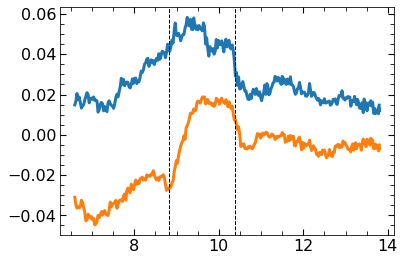

In [104]:
plot(m12b_t[300:-1], m12b_wsub[:,5])
plot(m12b_t[300:-1], m12b_wsub[:,10])

axvline(m12b_t[385], ls='--',lw=1, c='k')
axvline(m12b_t[447], ls='--',lw=1, c='k')

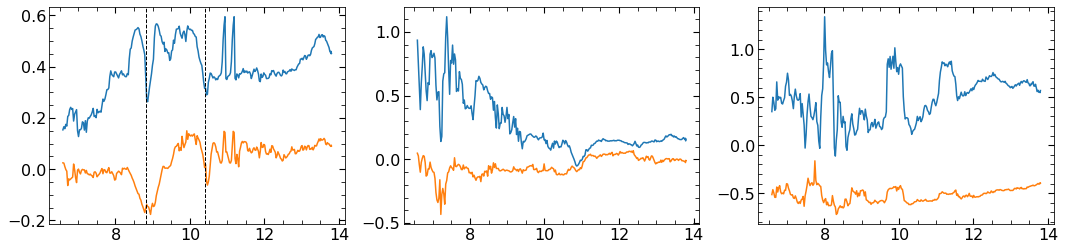

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

ax[0].plot(m12b_t[300:-1], m12b_st[100:,30], lw=1.5, label=r'$\theta=30$')
ax[0].plot(m12b_t[300:-1], m12b_st[100:,60], lw=1.5, label=r'$\theta=60$')

ax[1].plot(m12f_t[300:-1], m12f_st[100:,30], lw=1.5)
ax[1].plot(m12f_t[300:-1], m12f_st[100:,60], lw=1.5)

ax[2].plot(m12i_t[300:-1], m12i_st[100:,30], lw=1.5)
ax[2].plot(m12i_t[300:-1], m12i_st[100:,60], lw=1.5)


ax[0].axvline(m12b_t[385], ls='--',lw=1, c='k')
ax[0].axvline(m12b_t[447], ls='--',lw=1, c='k')

In [98]:
# m12b 

# subhalos 

m12c_wsub = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_50_300_subhalos_sats_False.txt')

# satellites 
m12c_wsat = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_50_300_subhalos_sats_True.txt')


# DM particles 
m12c_dm = np.zeros((300, 180)) 
#for i in range(300, 591, 10):
#    m12c_dm[i-300:i-290] = np.loadtxt('../data/corrfunc/m12c/m12c_wmatrix_corrfunc_50_300_dm_particles_sats_False_snaps_{:03d}_{:03d}.txt'.format(i, i+10))


# Stars 

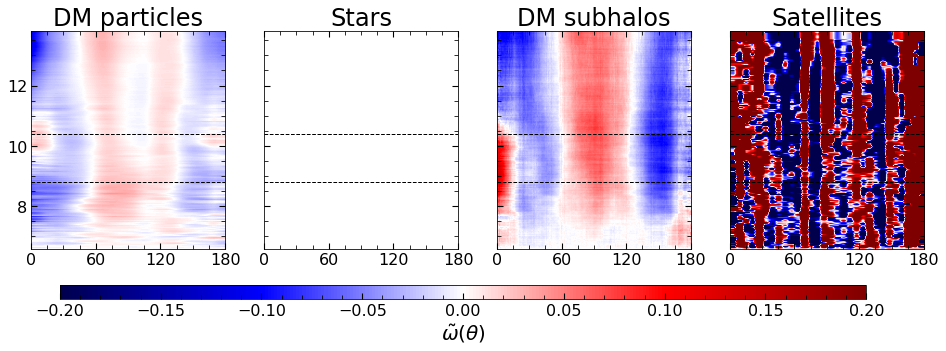

In [148]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharex=True, sharey=True)

im = ax[0].imshow(((m12i_dm+1)/(m12i_dm[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='seismic', 
       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')


im = ax[2].imshow(((m12i_wsub+1)/(m12i_wsub[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='seismic', 
       extent=[0, 180, m12c_t[300], m12i_t[-1]], aspect='auto')

im = ax[3].imshow(((m12i_wsat+1)/(m12i_wsat[0]+1)) - 1, origin='lower', vmin=-0.2, vmax=0.2, cmap='seismic', 
       extent=[0, 180, m12i_t[300], m12i_t[-1]], aspect='auto')

ax[0].set_title('DM particles')
ax[1].set_title('Stars')
ax[2].set_title('DM subhalos')
ax[3].set_title('Satellites')

ax[0].set_xticks([0, 60, 120, 180])

for i in range(4):
    ax[i].axhline(m12i_t[385], ls='--',lw=1, c='k')
    ax[i].axhline(m12i_t[447], ls='--',lw=1, c='k')



cbar_ax = fig.add_axes([0.15, -0.05, 0.7, 0.05])

cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$\tilde{\omega} (\theta)$')

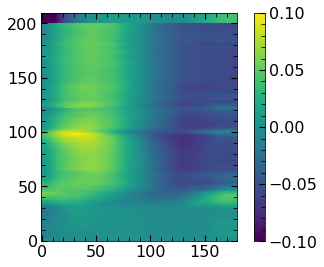

In [29]:
imshow(((wm12b_dm+1)/(wm12b_dm[0]+1)) - 1, origin='lower', vmin=-0.1, vmax=0.1)
colorbar()

/tmp/ipykernel_3012695/1422945855.py:4: RuntimeWarning: divide by zero encountered in true_divide
  im = ax[0][0].imshow(((wm12b+1)/(wm12b[0]+1)) - 1, origin='lower', extent=[0, 180, m12b_t[300], m12b_t[-1]],
/tmp/ipykernel_3012695/1422945855.py:4: RuntimeWarning: invalid value encountered in true_divide
  im = ax[0][0].imshow(((wm12b+1)/(wm12b[0]+1)) - 1, origin='lower', extent=[0, 180, m12b_t[300], m12b_t[-1]],
/tmp/ipykernel_3012695/1422945855.py:17: RuntimeWarning: divide by zero encountered in true_divide
  im = ax[1][1].imshow(((wm12r+1)/(wm12r[0]+1)) - 1, origin='lower', extent=[0, 180, m12r_t[300], m12r_t[-1]],
/tmp/ipykernel_3012695/1422945855.py:17: RuntimeWarning: invalid value encountered in true_divide
  im = ax[1][1].imshow(((wm12r+1)/(wm12r[0]+1)) - 1, origin='lower', extent=[0, 180, m12r_t[300], m12r_t[-1]],


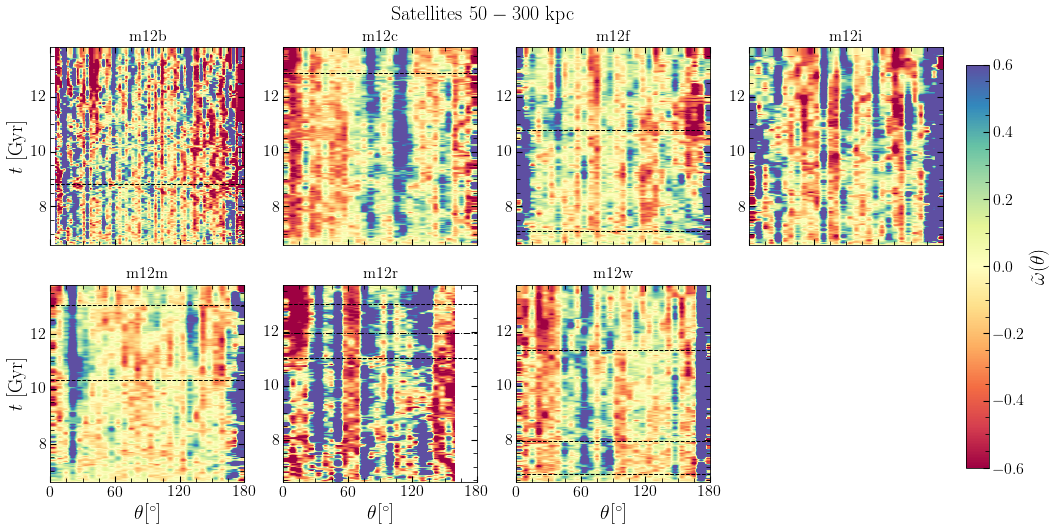

In [237]:
vmin=-0.6
vmax=0.6
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharex=True)
im = ax[0][0].imshow(((wm12b+1)/(wm12b[0]+1)) - 1, origin='lower', extent=[0, 180, m12b_t[300], m12b_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')
im = ax[0][1].imshow(((wm12c+1)/(wm12c[0]+1)) - 1, origin='lower', extent=[0, 180, m12c_t[300], m12c_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')
im = ax[0][2].imshow(((wm12f+1)/(wm12f[0]+1)) - 1, origin='lower', extent=[0, 180, m12f_t[300], m12f_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[0][3].imshow(((wm12i+1)/(wm12i[0]+1)) - 1, origin='lower', extent=[0, 180, m12i_t[300], m12i_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][0].imshow(((wm12m+1)/(wm12m[0]+1)) - 1, origin='lower', extent=[0, 180, m12m_t[300], m12m_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][1].imshow(((wm12r+1)/(wm12r[0]+1)) - 1, origin='lower', extent=[0, 180, m12r_t[300], m12r_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][2].imshow(((wm12w+1)/(wm12w[0]+1)) - 1, origin='lower', extent=[0, 180, m12w_t[300], m12w_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

ax[0][0].set_title(r'$\rm{m12b}$', fontsize=16)
ax[0][1].set_title(r'$\rm{m12c}$', fontsize=16)
ax[0][2].set_title(r'$\rm{m12f}$', fontsize=16)
ax[0][3].set_title(r'$\rm{m12i}$', fontsize=16)

ax[1][0].set_title(r'$\rm{m12m}$', fontsize=16)
ax[1][1].set_title(r'$\rm{m12r}$', fontsize=16)
ax[1][2].set_title(r'$\rm{m12w}$', fontsize=16)

for i in range(4):
    ax[1][i].set_xlabel(r'$\theta [^{\circ}]$')
ax[0][0].set_ylabel(r'$t\ \rm{[Gyr}]$')
ax[1][0].set_ylabel(r'$t\ \rm{[Gyr}]$')

ax[0][0].axhline(m12b_t[385], ls='--',lw=1, c='k')
ax[0][1].axhline(m12c_t[549], ls='--',lw=1, c='k')
ax[0][2].axhline(m12f_t[462], ls='--', lw=1, c='k')
ax[0][2].axhline(m12f_t[320], ls='--', lw=1, c='k')
ax[1][1].axhline(m12r_t[477], ls='--',lw=1, c='k')
ax[1][1].axhline(m12r_t[515], ls='-.',lw=1, c='k')
ax[1][1].axhline(m12r_t[560], ls='--',lw=1, c='k')
ax[1][0].axhline(m12m_t[444], ls='--',lw=1, c='k')
ax[1][0].axhline(m12m_t[558], ls='--',lw=1, c='k')
ax[1][2].axhline(m12w_t[490], ls='--',lw=1, c='k')
ax[1][2].axhline(m12w_t[358], ls='--',lw=1, c='k')
ax[1][2].axhline(m12w_t[311], ls='--',lw=1, c='k')

ax[1][3].axis('off')
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$\tilde{\omega} (\theta)$')

ax[0][0].set_xticks([0, 60, 120, 180])

plt.suptitle(r'$\rm{Satellites\ 50-300\ kpc}$', fontsize=20, y=0.95)

plt.savefig('m12_corrfunc_50_300_sats.png', bbox_inches='tight', dpi=300)
plt.savefig('m12_corrfunc_50_300_sats.pdf', bbox_inches='tight', dpi=300)

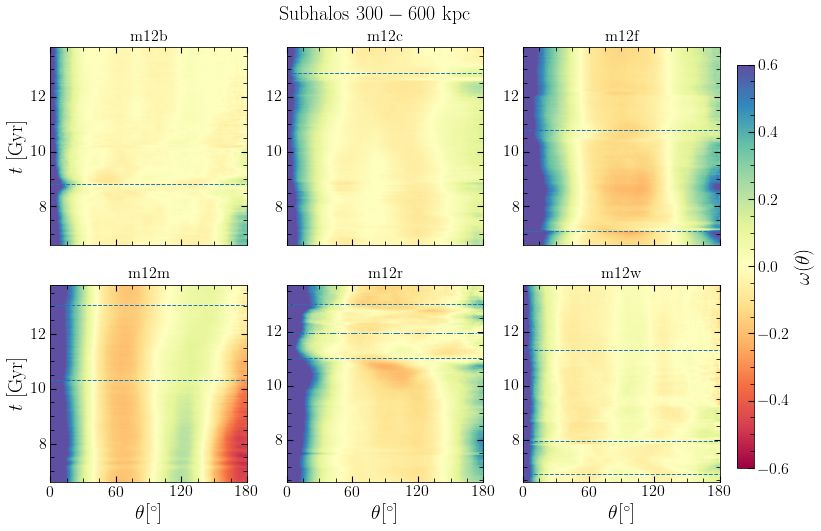

In [253]:
vmin=-0.6
vmax=0.6

fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True)
im = ax[0][0].imshow(wm12b, origin='lower', extent=[0, 180, m12b_t[300], m12b_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[0][1].imshow(wm12c, origin='lower', extent=[0, 180, m12c_t[300], m12c_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[0][2].imshow(wm12f, origin='lower', extent=[0, 180, m12f_t[300], m12f_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

#im = ax[0][3].imshow(wm12i - 1, origin='lower', extent=[0, 180, m12i_t[300], m12i_t[-1]],
#            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][0].imshow(wm12m, origin='lower', extent=[0, 180, m12m_t[300], m12m_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][1].imshow(wm12r, origin='lower', extent=[0, 180, m12r_t[300], m12r_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][2].imshow(wm12w, origin='lower', extent=[0, 180, m12w_t[300], m12w_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

ax[0][0].set_title(r'$\rm{m12b}$', fontsize=16)
ax[0][1].set_title(r'$\rm{m12c}$', fontsize=16)
ax[0][2].set_title(r'$\rm{m12f}$', fontsize=16)
#ax[0][3].set_title(r'$\rm{m12i}$', fontsize=16)

ax[1][0].set_title(r'$\rm{m12m}$', fontsize=16)
ax[1][1].set_title(r'$\rm{m12r}$', fontsize=16)
ax[1][2].set_title(r'$\rm{m12w}$', fontsize=16)

for i in range(3):
    ax[1][i].set_xlabel(r'$\theta [^{\circ}]$')
ax[0][0].set_ylabel(r'$t\ \rm{[Gyr}]$')
ax[1][0].set_ylabel(r'$t\ \rm{[Gyr}]$')

ax[0][0].axhline(m12b_t[385], ls='--',lw=1)
ax[0][1].axhline(m12c_t[549], ls='--',lw=1)
ax[0][2].axhline(m12f_t[462], ls='--', lw=1)
ax[0][2].axhline(m12f_t[320], ls='--', lw=1)
ax[1][1].axhline(m12r_t[477], ls='--',lw=1)
ax[1][1].axhline(m12r_t[515], ls='-.',lw=1)
ax[1][1].axhline(m12r_t[560], ls='--',lw=1)
ax[1][0].axhline(m12m_t[444], ls='--',lw=1)
ax[1][0].axhline(m12m_t[558], ls='--',lw=1)
ax[1][2].axhline(m12w_t[490], ls='--',lw=1)
ax[1][2].axhline(m12w_t[358], ls='--',lw=1)
ax[1][2].axhline(m12w_t[311], ls='--',lw=1)

#ax[1][3].axis('off')
#ax[0][3].axis('off')

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$\omega (\theta)$')


ax[0][0].set_xticks([0, 60, 120, 180])

plt.suptitle(r'$\rm{Subhalos\ 300-600\ kpc}$', fontsize=20, y=0.95)

plt.savefig('m12_sat_corrfunc_300_600.png', bbox_inches='tight', dpi=300)
plt.savefig('m12_sat_corrfunc_300_600.pdf', bbox_inches='tight', dpi=300)



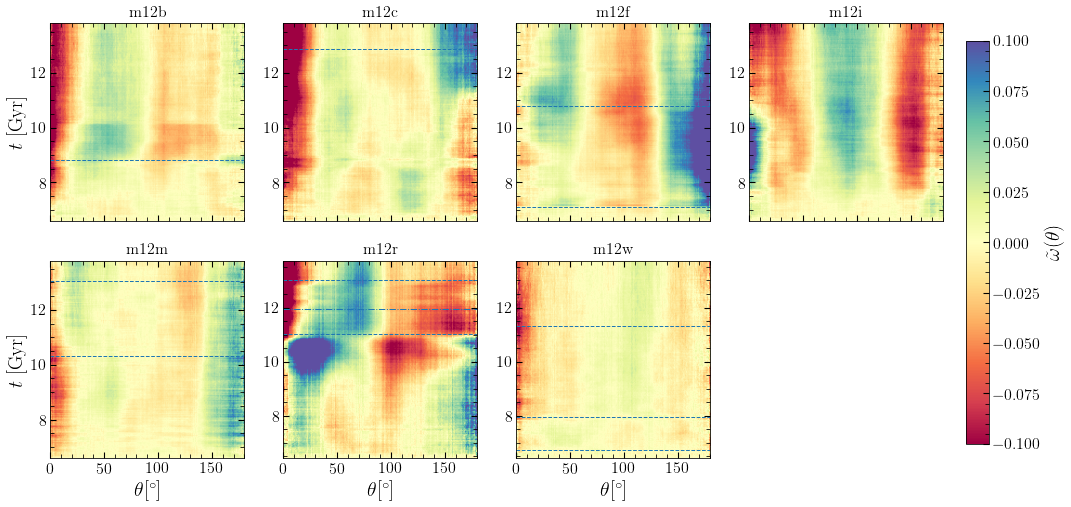

In [135]:
vmin=-0.1
vmax=0.1
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharex=True)
im = ax[0][0].imshow(((wm12b+1)/(wm12b[0]+1)) - 1, origin='lower', extent=[0, 180, m12b_t[300], m12b_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')
im = ax[0][1].imshow(((wm12c+1)/(wm12c[0]+1)) - 1, origin='lower', extent=[0, 180, m12c_t[300], m12c_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')
im = ax[0][2].imshow(((wm12f+1)/(wm12f[0]+1)) - 1, origin='lower', extent=[0, 180, m12f_t[300], m12f_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[0][3].imshow(((wm12i+1)/(wm12i[0]+1)) - 1, origin='lower', extent=[0, 180, m12i_t[300], m12i_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][0].imshow(((wm12m+1)/(wm12m[0]+1)) - 1, origin='lower', extent=[0, 180, m12m_t[300], m12m_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][1].imshow(((wm12r+1)/(wm12r[0]+1)) - 1, origin='lower', extent=[0, 180, m12r_t[300], m12r_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

im = ax[1][2].imshow(((wm12w+1)/(wm12w[0]+1)) - 1, origin='lower', extent=[0, 180, m12w_t[300], m12w_t[-1]],
            vmin=vmin, vmax=vmax, aspect='auto', cmap='Spectral')

ax[0][0].set_title(r'$\rm{m12b}$', fontsize=16)
ax[0][1].set_title(r'$\rm{m12c}$', fontsize=16)
ax[0][2].set_title(r'$\rm{m12f}$', fontsize=16)
ax[0][3].set_title(r'$\rm{m12i}$', fontsize=16)

ax[1][0].set_title(r'$\rm{m12m}$', fontsize=16)
ax[1][1].set_title(r'$\rm{m12r}$', fontsize=16)
ax[1][2].set_title(r'$\rm{m12w}$', fontsize=16)

for i in range(4):
    ax[1][i].set_xlabel(r'$\theta [^{\circ}]$')
ax[0][0].set_ylabel(r'$t\ \rm{[Gyr}]$')
ax[1][0].set_ylabel(r'$t\ \rm{[Gyr}]$')

ax[0][0].axhline(m12b_t[385], ls='--',lw=1)
ax[0][1].axhline(m12c_t[549], ls='--',lw=1)
ax[0][2].axhline(m12f_t[462], ls='--', lw=1)
ax[0][2].axhline(m12f_t[320], ls='--', lw=1)
ax[1][1].axhline(m12r_t[477], ls='--',lw=1)
ax[1][1].axhline(m12r_t[515], ls='-.',lw=1)
ax[1][1].axhline(m12r_t[560], ls='--',lw=1)
ax[1][0].axhline(m12m_t[444], ls='--',lw=1)
ax[1][0].axhline(m12m_t[558], ls='--',lw=1)
ax[1][2].axhline(m12w_t[490], ls='--',lw=1)
ax[1][2].axhline(m12w_t[358], ls='--',lw=1)
ax[1][2].axhline(m12w_t[311], ls='--',lw=1)

ax[1][3].axis('off')
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(r'$\tilde{\omega} (\theta)$')

#plt.savefig('m12_corrfunc_50_300.png', bbox_inches='tight', dpi=300)
#plt.savefig('m12_corrfunc_50_300.pdf', bbox_inches='tight', dpi=300)



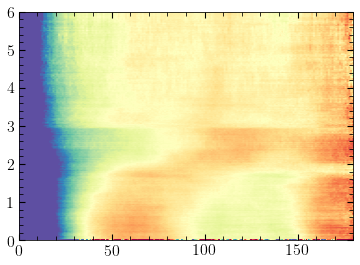

In [27]:
im = imshow(wm12b, origin='lower', extent=[0, 180, 0, 6],
            vmin=-0.1, vmax=0.1, aspect='auto', cmap='Spectral')

In [2]:
sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/"


In [3]:
p = ga.io.Read.read_snapshots(['dark', 'star'], 'snapshot', 385, sim_directory, 
                              assign_hosts=True, particle_subsample_factor=100)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 385, redshift = 0.488


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_385/snapshot_385.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 64162001 particles
    star      (id = 4): 10869964 particles
    blackhole (id = 5): 0 particles

* reading species: ['dark', 'star']
* reading particles from:
    snapshot_385.0.hdf5
    snapshot_385.1.hdf5
    snapshot_385.2.hdf5
    snapshot_385.3.hdf5
    snapshot_385.4.hdf5
    snapshot_385.5.hdf5
    snapshot_385.6.hdf5
    snapshot_385.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition/ic_agora_m12b.conf

* periodically subsampli

In [4]:
m12b_halo = halo.io.IO.read_catalogs('snapshot', 300, sim_directory)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864


# in halo_analysis.halo_io.IO():
* read 51054 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 51054 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished



In [5]:
m12b_300_index = m12b_halo['tree.index']

In [6]:
halt = halo.io.IO.read_tree(simulation_directory=sim_directory)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5

